In [1]:
# numerical module
import numpy as np

# setup plotting
import matplotlib.pyplot as plt
plt.style.use('../../matplotlib/SciencePlots-APS.mplstyle')

In [2]:
# module for analysis optical data Quantum ESPRESSO
c = 299792458.0                       # [m/s]
hbar = 6.582119569e-16                # [eV.s]
alpha_pref = np.sqrt(2) / (hbar * c)  # [1/m]

def optical_properties(energy, eps1, eps2, fname):
    # average epsilon
    AverageReEps = np.mean(eps1[:, 1:], axis=1)
    AverageImEps = np.mean(eps2[:, 1:], axis=1)
    # refractive index
    def nn(eps1, eps2):
        eps = np.sqrt(eps1 * eps1 + eps2 * eps2)
        return np.sqrt((eps + eps1) / 2.)
    # extinction coefficient
    def kappa(eps1, eps2):
        eps = np.sqrt(eps1 * eps1 + eps2 * eps2)
        return np.sqrt((eps - eps1) / 2.)
    # absorption coefficient
    def alpha(energy, eps1, eps2):
        eps = np.sqrt(eps1 * eps1 + eps2 * eps2)
        return alpha_pref * energy * np.sqrt(eps - eps1)
    # store data
    data_nn = nn(AverageReEps, AverageImEps)
    data_kappa = kappa(AverageReEps, AverageImEps)
    data_alpha = alpha(energy, AverageReEps, AverageImEps)
    # save data into .dat
    with open(fname, 'w+') as f:
        f.write('#   omega [eV]     refractive_index      extinction_coeff       alpha[1/m]\n')
        for i in range(len(energy)):
            f.write(f'{energy[i]:.6f}     {data_nn[i]:.6f}     {data_kappa[i]:.6f}     {data_alpha[i]:.6f}\n')
        f.write('\n')
    print('Optical data for {} has been saved'.format(fname))
    return 

## GaAs

In [3]:
# read data real epsilon
EnGaAs, ReEpsGaAsX, ReEpsGaAsY, ReEpsGaAsZ = np.loadtxt('../III-V/GaAs/epsilon/epsr_GaAs.dat', unpack=True)
# read data imaginary epsilon
EnGaAs, ImEpsGaAsX, ImEpsGaAsY, ImEpsGaAsZ = np.loadtxt('../III-V/GaAs/epsilon/epsi_GaAs.dat', unpack=True)
# combined real epsilon data
ReEpsGaAs = np.column_stack((ReEpsGaAsX, ReEpsGaAsY, ReEpsGaAsZ) )
# combined imaginary epsilon data
ImEpsGaAs = np.column_stack((ImEpsGaAsX, ImEpsGaAsY, ImEpsGaAsZ) )
# save data optical
optical_properties(EnGaAs, ReEpsGaAs, ImEpsGaAs, './optical-data/OptGaAs.dat')

Optical data for ./optical-data/OptGaAs.dat has been saved


## GaSb

In [4]:
# read data real epsilon
EnGaSb, ReEpsGaSbX, ReEpsGaSbY, ReEpsGaSbZ = np.loadtxt('../III-V/GaSb/epsilon/epsr_GaSb.dat', unpack=True)
# read data imaginary epsilon
EnGaSb, ImEpsGaSbX, ImEpsGaSbY, ImEpsGaSbZ = np.loadtxt('../III-V/GaSb/epsilon/epsi_GaSb.dat', unpack=True)
# combined real epsilon data
ReEpsGaSb = np.column_stack((ReEpsGaSbX, ReEpsGaSbY, ReEpsGaSbZ) )
# combined imaginary epsilon data
ImEpsGaSb = np.column_stack((ImEpsGaSbX, ImEpsGaSbY, ImEpsGaSbZ) )
# save data optical
optical_properties(EnGaSb, ReEpsGaSb, ImEpsGaSb, './optical-data/OptGaSb.dat')

Optical data for ./optical-data/OptGaSb.dat has been saved


## InAs

In [5]:
# read data real epsilon
EnInAs, ReEpsInAsX, ReEpsInAsY, ReEpsInAsZ = np.loadtxt('../III-V/InAs/epsilon/epsr_InAs.dat', unpack=True)
# read data imaginary epsilon
EnInAs, ImEpsInAsX, ImEpsInAsY, ImEpsInAsZ = np.loadtxt('../III-V/InAs/epsilon/epsi_InAs.dat', unpack=True)
# combined real epsilon data
ReEpsInAs = np.column_stack((ReEpsInAsX, ReEpsInAsY, ReEpsInAsZ) )
# combined imaginary epsilon data
ImEpsInAs = np.column_stack((ImEpsInAsX, ImEpsInAsY, ImEpsInAsZ) )
# save data optical
optical_properties(EnInAs, ReEpsInAs, ImEpsInAs, './optical-data/OptInAs.dat')

Optical data for ./optical-data/OptInAs.dat has been saved


## InP

In [6]:
# read data real epsilon
EnInP, ReEpsInPX, ReEpsInPY, ReEpsInPZ = np.loadtxt('../III-V/InP/epsilon/epsr_InP.dat', unpack=True)
# read data imaginary epsilon
EnInP, ImEpsInPX, ImEpsInPY, ImEpsInPZ = np.loadtxt('../III-V/InP/epsilon/epsi_InP.dat', unpack=True)
# combined real epsilon data
ReEpsInP = np.column_stack((ReEpsInPX, ReEpsInPY, ReEpsInPZ) )
# combined imaginary epsilon data
ImEpsInP = np.column_stack((ImEpsInPX, ImEpsInPY, ImEpsInPZ) )
# save data optical
optical_properties(EnInP, ReEpsInP, ImEpsInP, './optical-data/OptInP.dat')

Optical data for ./optical-data/OptInP.dat has been saved


## Silicon

In [7]:
# read data real epsilon
EnSi, ReEpsSiX, ReEpsSiY, ReEpsZ = np.loadtxt('../Si/epsilon/epsr_Si.dat', unpack=True)
# read data imaginary epsilon
EnSi, ImEpsSiX, ImEpsSiY, ImEpsSiZ = np.loadtxt('../Si/epsilon/epsi_Si.dat', unpack=True)
# combined real epsilon data
ReEpsSi = np.column_stack((ReEpsSiX, ReEpsSiY, ReEpsZ) )
# combined imaginary epsilon data
ImEpsSi = np.column_stack((ImEpsSiX, ImEpsSiY, ImEpsSiZ) )
# save data optical
optical_properties(EnSi, ReEpsSi, ImEpsSi, './optical-data/OptSi.dat')

Optical data for ./optical-data/OptSi.dat has been saved


## Plot refractive index and extinction coefficient

### III-V group

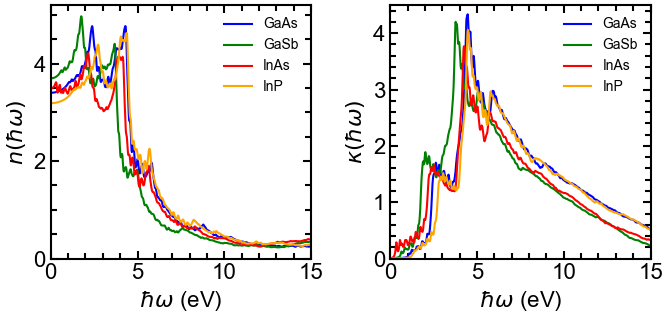

In [8]:
# load optical data for III-V group
## GaAs
OptGaAs = np.loadtxt('./optical-data/OptGaAs.dat')
## GaSb
OptGaSb = np.loadtxt('./optical-data/OptGaSb.dat')
## InAs
OptInAs = np.loadtxt('./optical-data/OptInAs.dat')
## InP
OptInP = np.loadtxt('./optical-data/OptInP.dat')

# plot the figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3.5))
# ----------------------------------#
# plot refractive index
# ----------------------------------#
axes[0].plot(OptGaAs[:, 0], OptGaAs[:, 1], color='blue', lw=1.5, label='GaAs')
axes[0].plot(OptGaSb[:, 0], OptGaSb[:, 1], color='green', lw=1.5, label='GaSb')
axes[0].plot(OptInAs[:, 0], OptInAs[:, 1], color='red', lw=1.5, label='InAs')
axes[0].plot(OptInP[:, 0], OptInP[:, 1], color='orange', lw=1.5, label='InP')
# X-axis
axes[0].set_xlim(0.0, 15.0)
axes[0].set_xlabel('$\hbar \omega$ (eV)')
# Y-axis
axes[0].set_ylim(0.0, 5.2)
axes[0].set_ylabel('$n(\hbar \omega)$')
axes[0].legend(loc='best', prop={'size': 10})
# ----------------------------------#
# plot extinction coefficient
# ----------------------------------#
axes[1].plot(OptGaAs[:, 0], OptGaAs[:, 2], color='blue', lw=1.5, label='GaAs')
axes[1].plot(OptGaSb[:, 0], OptGaSb[:, 2], color='green', lw=1.5, label='GaSb')
axes[1].plot(OptInAs[:, 0], OptInAs[:, 2], color='red', lw=1.5,label='InAs')
axes[1].plot(OptInP[:, 0], OptInP[:, 2], color='orange', lw=1.5, label='InP')
# X-axis
axes[1].set_xlim(0.0, 15.0)
axes[1].set_xlabel('$\hbar \omega$ (eV)')
# Y-axis
axes[1].set_ylim(0.0, 4.5)
axes[1].set_ylabel('$\kappa(\hbar \omega)$')
axes[1].legend(loc='best', prop={'size': 10})

plt.tight_layout()

# save figure
fig.savefig('../../imag/Optical-III-V-group.svg')
plt.show()

## Comparison GaSb and Si

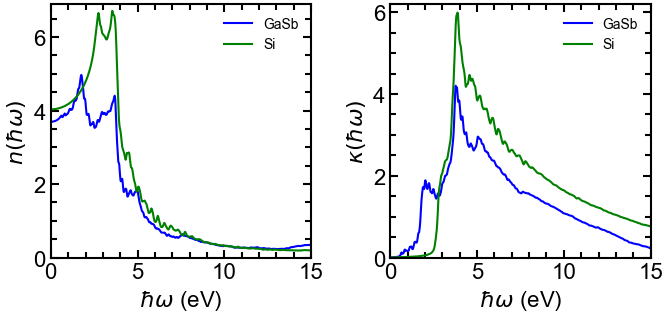

In [9]:
# load data optical silicon
## Si
OptSi = np.loadtxt('./optical-data/OptSi.dat')
# plot the figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3.5))
# ----------------------------------#
# plot refractive index
# ----------------------------------#
axes[0].plot(OptGaSb[:, 0], OptGaSb[:, 1], color='blue', lw=1.5, label='GaSb')
axes[0].plot(OptSi[:, 0], OptSi[:, 1], color='green', lw=1.5, label='Si')
# X-axis
axes[0].set_xlim(0.0, 15.0)
axes[0].set_xlabel('$\hbar \omega$ (eV)')
# Y-axis
axes[0].set_ylim(0.0, 6.9)
axes[0].set_ylabel('$n(\hbar \omega)$')
axes[0].legend(loc='best', prop={'size': 10})

# ----------------------------------#
# plot extinction coefficient
# ----------------------------------#
axes[1].plot(OptGaSb[:, 0], OptGaSb[:, 2], color='blue', lw=1.5, label='GaSb')
axes[1].plot(OptSi[:, 0], OptSi[:, 2], color='green', lw=1.5, label='Si')
axes[1].set_xlim(0.0, 15.0)
axes[1].set_xlabel('$\hbar \omega$ (eV)')
# Y-axis
axes[1].set_ylim(0.0, 6.2)
axes[1].set_ylabel('$\kappa(\hbar \omega)$')
axes[1].legend(loc='best', prop={'size': 10})

plt.tight_layout()

# save figure
fig.savefig('../../imag/Optical-GaSb-Si.svg')

plt.show()